In [ ]:
Multi-output regression/ classifciation with question values as labels. Unfinished. 

In [150]:
import pandas as pd
jepordy_json_file = (r'C:\Users\Jodre\Downloads\Jeopardy_Questions1.json')
jepordy_json = pd.read_json(jepordy_json_file, convert_dates=True)
jepordy_json.head()


,category,air_date,question,value,answer,round,show_number
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680


In [153]:
jepordy_json.shape
data = jepordy_json
intval = data['value'].str.split('$').str[-1]
data['intvalue'] = intval
data


,category,air_date,question,value,answer,round,show_number,intvalue
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680,200
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680,200
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680,200
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680,200
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680,200
...,...,...,...,...,...,...,...,...
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,$2000,Turandot,Double Jeopardy!,4999,2000
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,$2000,a titmouse,Double Jeopardy!,4999,2000
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",$2000,Clive Barker,Double Jeopardy!,4999,2000
216928,QUOTATIONS,2006-05-11,"'From Ft. Sill, Okla. he made the plea, Arizon...",$2000,Geronimo,Double Jeopardy!,4999,2000


formatting and type conversions

In [154]:
data["intvalu"]=data["intvalue"].str.replace(',','')
data["intval"] = pd.to_numeric(data.intvalu)

delete all rows where question value is NaN

In [155]:
data.dropna(subset = ["intval"], inplace=True)
data['intval'].isnull().sum()

0

Delete the rows with questions values that are not 400, 800, 1200, 1600, 2000 cause these are the standard questions. Values out side this are daily double questions where the player bets from their existing winnings to give the value to the question therefore the question cannot be a predictor or the value. https://datagenetics.com/blog/september12012/index.html We also know that all final jeopardy values are NaN as this is a betting phase in the game.

From Wiki, the 1984 series' first-round originally ranged from  100𝑡𝑜 500 (doubled again from the second pilot) and was doubled to  200– 1,000 on November 26, 2001.

In [156]:
array = [200, 400, 600, 800, 1000, 1200, 1600, 2000]
data = data.loc[data['intval'].isin(array)]


In [157]:
from io import StringIO
col = ['intval', 'question']
data = data[col]
data = data[pd.notnull(data['question'])]
data.columns = ['intval', 'question']
data['category_id'] = data['intval'].factorize()[0]
category_id_df = data[['intval', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'intval']].values)
data.head()

,intval,question,category_id
0,200.0,"'For the last 8 years of his life, Galileo was...",0
1,200.0,'No. 2: 1912 Olympian; football star at Carlis...,0
2,200.0,'The city of Yuma in this state has a record a...,0
3,200.0,"'In 1963, live on ""The Art Linkletter Show"", t...",0
4,200.0,"'Signer of the Dec. of Indep., framer of the C...",0


Below bias to small values. There is an option to combine 1000 with 1200 and 1600 with 2000 but we will leave it. 

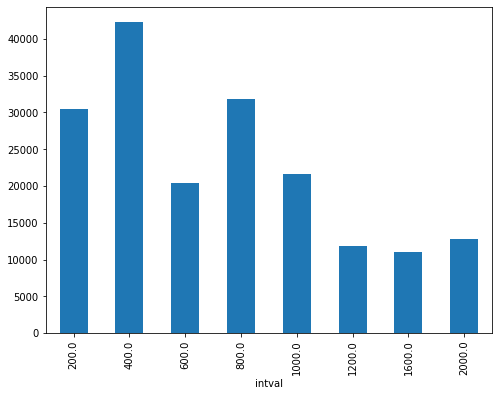

In [158]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('intval').question.count().plot.bar(ylim=0)
plt.show()

In [159]:
data.shape
df = df.sample(frac=1).reset_index(drop=True)
df1 = df.iloc[ :90000]
df1.shape

(90000, 3)

In [160]:
df1

,intval,question,category_id
0,200.0,'A shark named Bruce is a member of Fish-Eater...,0
1,400.0,'A person who specializes in Sinology would be...,1
2,400.0,'This tall tree can be lodgepole or ponderosa',1
3,1000.0,'He was twice prime minister of France before ...,4
4,400.0,"'He co-starred as Detective Falconer on ""Siste...",1
...,...,...,...
89995,1000.0,"'<a href=""http://www.j-archive.com/media/2006-...",4
89996,600.0,"'""At"", ""by"" & ""of"" are all this part of speech'",2
89997,1600.0,'Humorist Sidney Joseph...',6
89998,600.0,'British term for schools like Eton that are a...,2


memory issue so runing half

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.question).toarray()
labels = df1.category_id
features.shape

(90000, 24303)

In [10]:
# import sys
# print(sys.executable)
# print(sys.version)
# print(sys.version_info)

C:\Users\Jodre\miniconda3\python.exe
3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


In [ ]:
df1

In [72]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for intval, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels  == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(intval))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '200.0':
  . Most correlated unigrams:
. href
. http
  . Most correlated bigrams:
. archive com
. http www
# '400.0':
  . Most correlated unigrams:
. media
. convinced
  . Most correlated bigrams:
. com media
. ve got
# '600.0':
  . Most correlated unigrams:
. commemorating
. grim
  . Most correlated bigrams:
. say br
. country major
# '800.0':
  . Most correlated unigrams:
. pale
. keg
  . Most correlated bigrams:
. means shaped
. smallest state
# '1000.0':
  . Most correlated unigrams:
. 28_j_30
. 27_j_10
  . Most correlated bigrams:
. daily double
. george eliot
# '1200.0':
  . Most correlated unigrams:
. target
. frontal
  . Most correlated bigrams:
. com media
. href http
# '1600.0':
  . Most correlated unigrams:
. bathing
. 13_dj_29
  . Most correlated bigrams:
. clothing line
. king men
# '2000.0':
  . Most correlated unigrams:
. jpg
. _blank
  . Most correlated bigrams:
. jpg target
. target _blank


Above href has appeared for 1200 and 200 therefore

In [162]:
df1[df1['question'].str.contains("href")]

,intval,question,category_id
28,800.0,"'<a href=""http://www.j-archive.com/media/2007-...",3
66,1200.0,"'<a href=""http://www.j-archive.com/media/2008-...",5
103,1000.0,"'(<a href=""http://www.j-archive.com/media/2005...",4
113,1000.0,"'(<a href=""http://www.j-archive.com/media/2008...",4
115,400.0,"'(<a href=""http://www.j-archive.com/media/2005...",1
...,...,...,...
89876,600.0,"'<a href=""http://www.j-archive.com/media/2007-...",2
89890,400.0,"'It's the giant beast seen <a href=""http://www...",1
89957,600.0,"'<a href=""http://www.j-archive.com/media/2008-...",2
89978,1000.0,"'Title of <a href=""http://www.j-archive.com/me...",4


In [163]:
rowData = df1.loc[ 89988 , "question" ]
print(rowData)

'Around 1485 this Florentine painted "Mars and Venus" & "The Birth of Venus"'


Cleaning

In [164]:
df1["question"] = df1["question"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")

<ipython-input-164-7880932e1cfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["question"] = df1["question"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")


In [165]:
df1['question'] = df1['question'].str.replace(r'href\S+http\S+|www.\S+', '', case=False)

<ipython-input-165-fa06aaf9e713>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['question'] = df1['question'].str.replace(r'href\S+http\S+|www.\S+', '', case=False)


In [166]:
df1['question'] = df1['question'].str.replace("href", " ")
df1['question'] = df1['question'].str.replace("</a>", " ")
df1['question'] = df1['question'].str.replace("<a", " ")
df1['question'] = df1['question'].str.replace("(", " ")
df1['question'] = df1['question'].str.replace(")", " ")
df1['question'] = df1['question'].str.replace("=", " ")
df1['question'] = df1['question'].str.replace("_", " ")
df1['question'] = df1['question'].str.replace(">", " ")
df1['question'] = df1['question'].str.replace("jpg", " ")
df1['question'] = df1['question'].str.replace("target", " ")
df1['question'] = df1['question'].str.replace("blank", " ")
df1['question'] = df1['question'].str.replace("com", " ")

<ipython-input-166-cc96bb992143>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['question'] = df1['question'].str.replace("href", " ")
<ipython-input-166-cc96bb992143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['question'] = df1['question'].str.replace("</a>", " ")
<ipython-input-166-cc96bb992143>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [167]:
rowData = df1.loc[ 89988 , "question" ]
print(rowData)

'Around 1485 this Florentine painted "Mars and Venus" & "The Birth of Venus"'


In [168]:
df1[df1['question'].str.contains("28_j_30")]
df1[df1['question'].str.contains("br")]
df1[df1['question'].str.contains("13_dj_29")]


,intval,question,category_id


In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.question).toarray()
labels = df1.category_id
features.shape

(90000, 24094)

In [172]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for intval, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels  == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(intval))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '200.0':
  . Most correlated unigrams:
. clue
. continent
  . Most correlated bigrams:
. demi moore
. clue crew
# '400.0':
  . Most correlated unigrams:
. showman
. panda
  . Most correlated bigrams:
. just west
. current governor
# '600.0':
  . Most correlated unigrams:
. chilly
. predatory
  . Most correlated bigrams:
. given names
. religious movement
# '800.0':
  . Most correlated unigrams:
. conscience
. strangelove
  . Most correlated bigrams:
. miles coast
. song hit
# '1000.0':
  . Most correlated unigrams:
. clue
. clotting
  . Most correlated bigrams:
. clue crew
. blood clotting
# '1200.0':
  . Most correlated unigrams:
. byrne
. specimens
  . Most correlated bigrams:
. edward vii
. br jane
# '1600.0':
  . Most correlated unigrams:
. crew
. clue
  . Most correlated bigrams:
. geologic time
. clue crew
# '2000.0':
  . Most correlated unigrams:
. caldwell
. bryan
  . Most correlated bigrams:
. double br
. daily double


In [ ]:
1/ Transformed the questions into a vector of numbers. TF-IDF weighted vectors.
2/ The next step is to train supervised classifiers to train unseen “questions” and predict the “value”.
